# Самостоятельная работа №7

In [3]:
f <- function(x) x^2
x <- seq(-10, 10, 0.1)
y <- f(x)

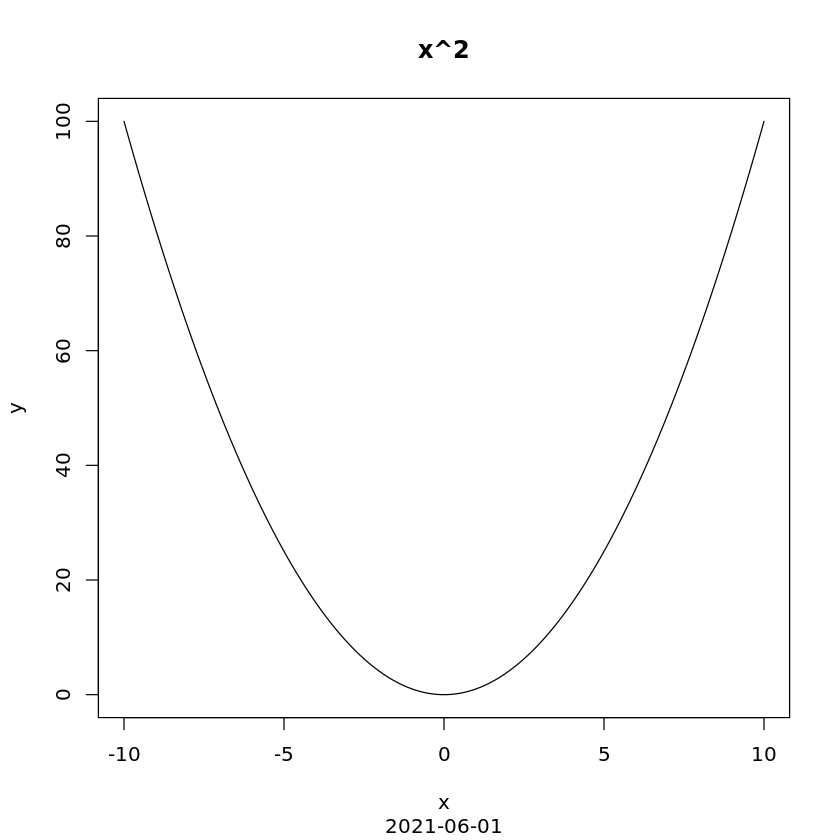

In [4]:
plot(x, y, type="l", main="x^2", sub=Sys.Date())

In [5]:
marks <- matrix(0, 4, 3)
input_vector <- function(len, prompt="", elements=c(), handle=function(x) { as.numeric(x) }) {
    if (length(elements) == 0) {
        elements <- 1:len
    }
    vec <- rep(c(0), len)
    for (i in 1:len) {
        vec[i] <- handle(readline(prompt=paste(prompt, " оценка за ", elements[i], ":", sep="")))
    }
    return(vec)
}

In [ ]:
input <- sapply(1:4, function (x) input_vector(3, prompt=paste("Студент", x), elements=c("Введение в профф", "Математическая логика", "Теория графов")))
input <- t(input)

In [9]:
rownames(input) <- sapply(1:length(input[, 1]), function(x) paste("Студент", x))

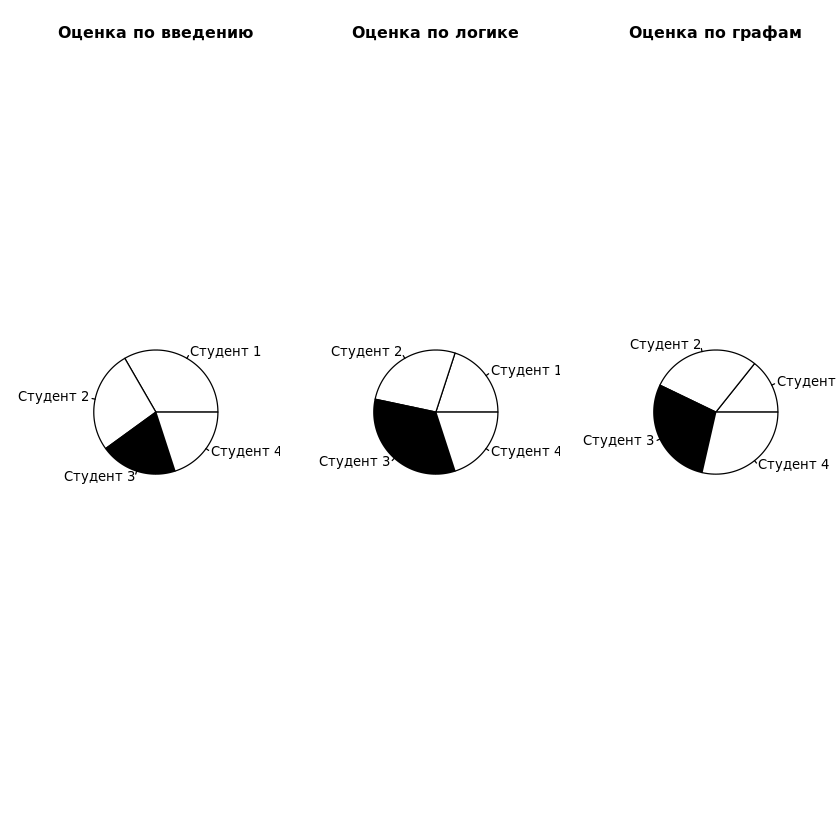

In [10]:
colours = c("white", "white", "black", "white")

par(mfrow=c(1,3))

pie(input[, 1], cex=1, radius=0.75, main="Оценка по введению", col=colours)
pie(input[, 2], cex=1, radius=0.75, main="Оценка по логике", col=colours)
pie(input[, 3], cex=1, radius=0.75, main="Оценка по графам", col=colours)

In [11]:
expression_to_function <- function(expr, vars=c("x")) {
    expr <- as.expression(expr)
    vars_string <- ""
    if (length(vars) == 0) {
        vars_string <- ""
    }
    else if (length(vars) == 1) {
        vars_string <- as.character(vars)
    }
    else {
        for (var in vars) {
            vars_string <- paste(vars_string, as.character(var), sep=",")
        }
        vars_string <- sub(".", "", vars_string)
    }
    return(eval(parse(text=paste("(function(", vars_string, ") {", as.character(expr), "})"))))
}

In [12]:
f <- function(x) {
    (3*x^2 - 30*x + 74.417) / (x - 5)
}
f.expr = expression((3*x^2 - 30*x + 74.417) / (x - 5))

In [13]:
f(0)

uniroot(f, interval=c(-10, 10))$root

f.deriv <- D(f.expr, "x")
f.deriv

df <- expression_to_function(f.deriv)
df

[1] -14.8834

[1] 5.440833

(3 * (2 * x) - 30)/(x - 5) - (3 * x^2 - 30 * x + 74.417)/(x - 
    5)^2

function (x) 
{
    (3 * (2 * x) - 30)/(x - 5) - (3 * x^2 - 30 * x + 74.417)/(x - 
        5)^2
}
<environment: 0x5572552aace8>

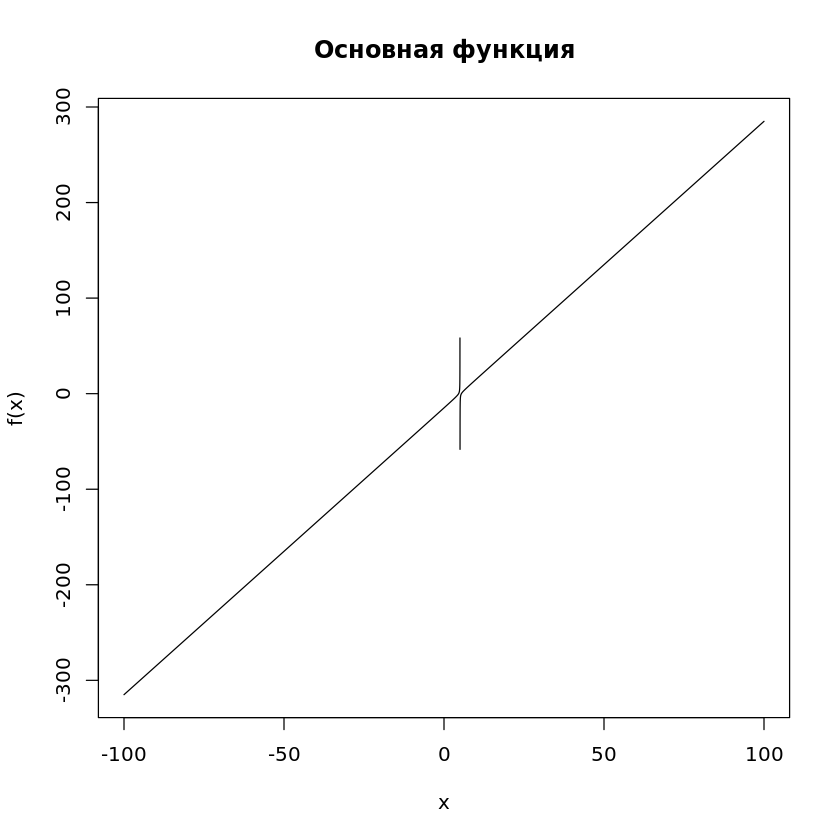

In [14]:
x <- seq(-100, 100, 0.01)

plot(x, f(x), type="l", main="Основная функция")

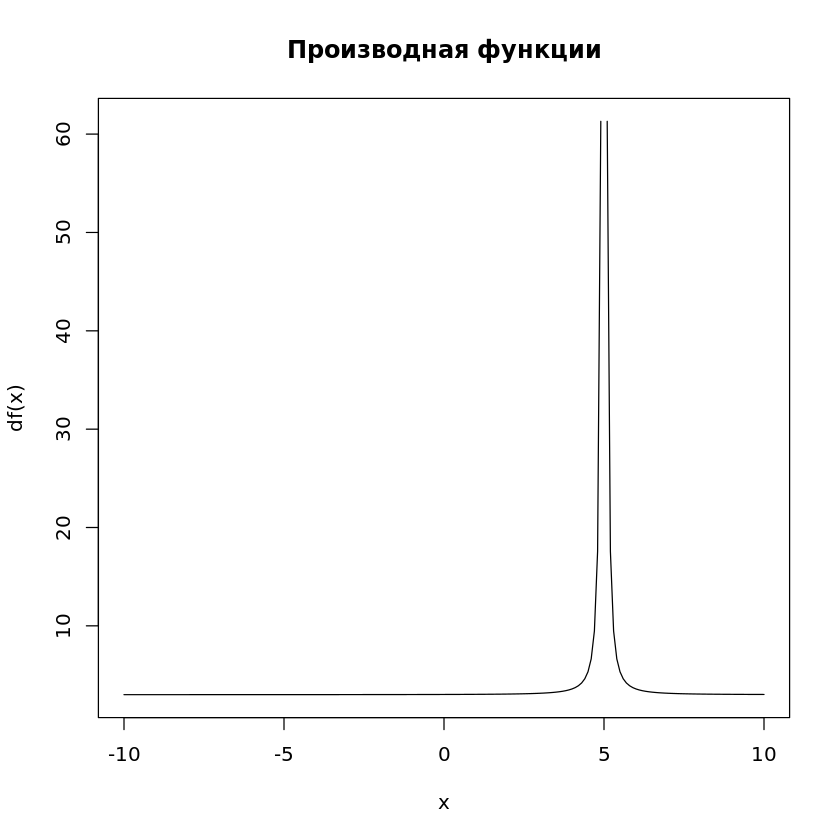

In [15]:
x <- seq(-10, 10, 0.1)

plot(x, df(x), type="l", main="Производная функции")

In [16]:
f <- function(x) {
    x^3 - 18*x^2 + 106.25*x - 205.5
}
f.expr <- expression(x^3 - 18*x^2 + 106.25*x - 205.5)

In [17]:
f(0)

uniroot(f, interval=c(-100, 100))$root

d.deriv <- D(f.expr, "x")
d.deriv

df <- expression_to_function(d.deriv)
df(0)

uniroot(df, interval=c(-10, 6))$root

[1] -205.5

[1] 7.322898

3 * x^2 - 18 * (2 * x) + 106.25

[1] 106.25

[1] 5.236239

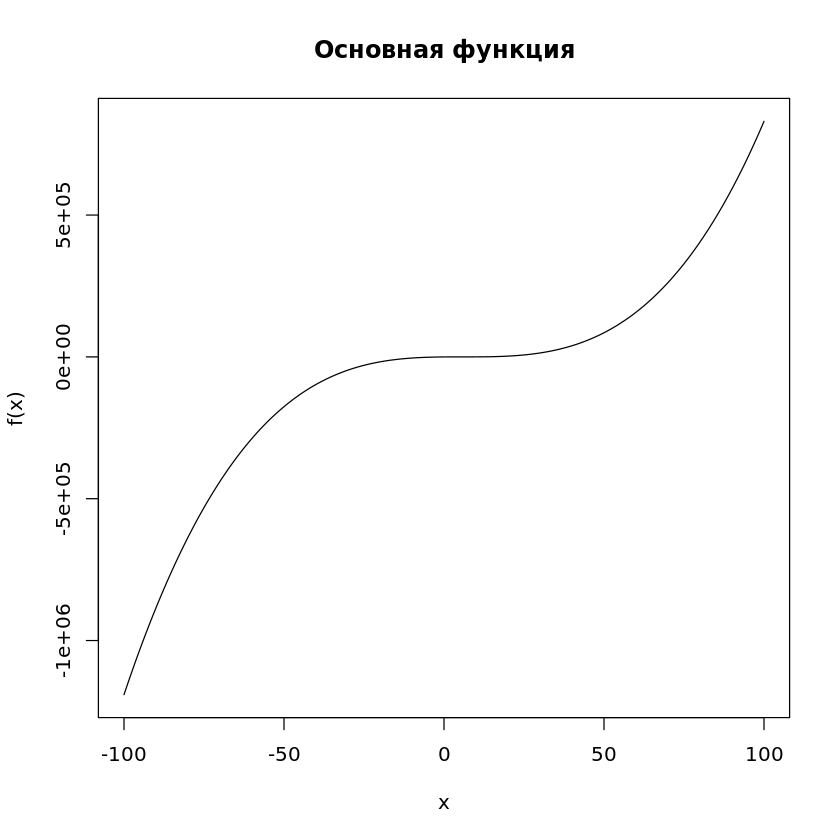

In [19]:
x <- seq(-100, 100, 0.01)

plot(x, f(x), type="l", main="Основная функция")

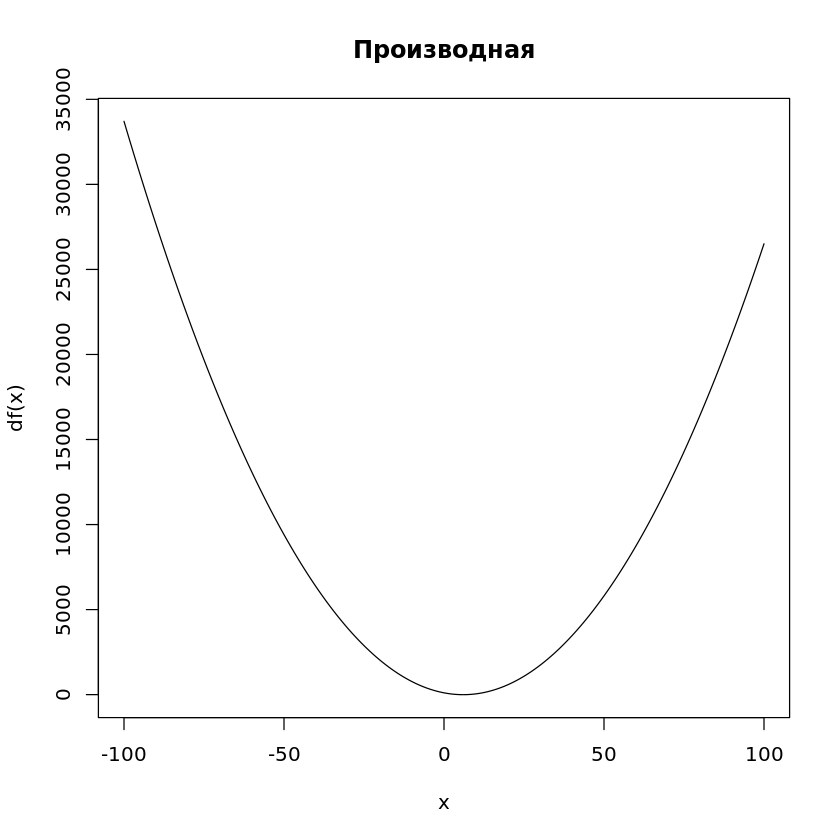

In [20]:
plot(x, df(x), type="l", main="Производная")

In [22]:
f <- function (x, y, a=1, b=1) {
    x^2 / a^2 + y^2 / b^2 - 1
}
f.expr = expression(x^2 / a^2 + y^2 / b^2 - 1)

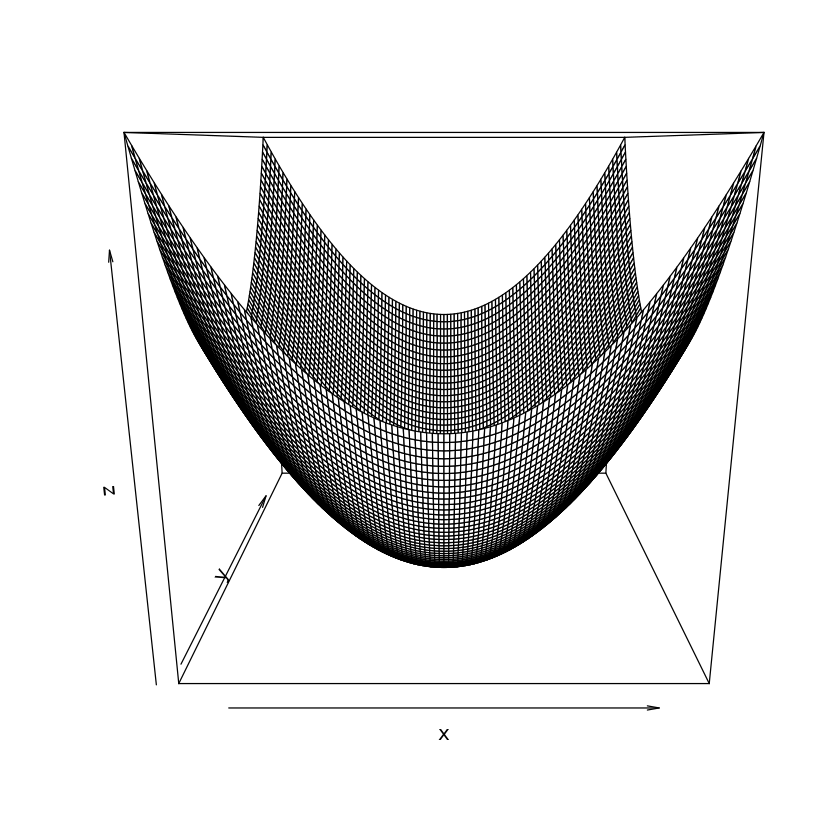

In [23]:
x <- seq(-5, 5, 0.1)
y <- x
z <- outer(x, y, function(x, y) x^2 + y^2 - 1)
persp(x,y,z)

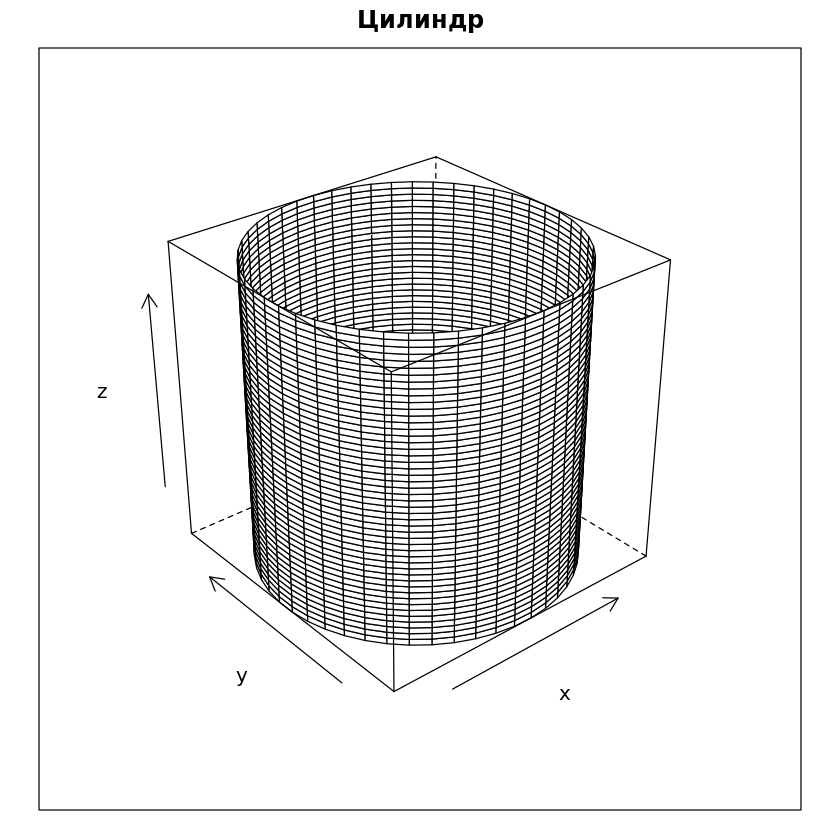

In [3]:
library(graphics)
library(lattice)

v <- seq(-2 * pi, 2 * pi, length=50)
k <- seq(0, 2 * pi, length=50)
a <- 3
b <- 3


x <- outer(v, k, function(v, k) a * cos(k))
y <- outer(v, k, function(v, k) a * sin(k))
z <- outer(v, k, function(v, k) v)


wireframe(z ~ x * y, main="Цилиндр")

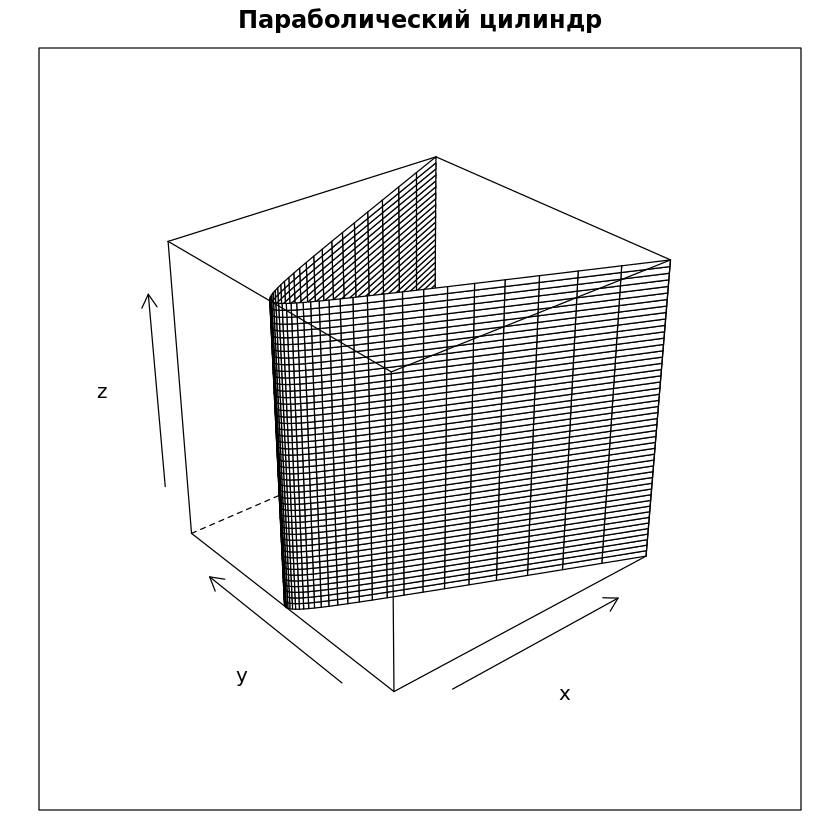

In [5]:
d <- seq(-pi, pi, length=50)
e <- seq(-pi, pi, length=50)
a <- 2
b <- 3

x <- outer(d, e, function(d, e) a * cosh(d))
y <- outer(d, e, function(d, e) b * sinh(d))
z <- outer(d, e, function(d, e) e)

wireframe(z ~ x * y, main="Параболический цилиндр")